In [57]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
#from pandas_profiling import ProfileReport

%matplotlib inline
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 
#from pandas_profiling import ProfileReport
import math

from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant  
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant  
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.datasets import make_classification
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from sklearn.model_selection import train_test_split
#from imblearn.over_sampling import SMOTE

#from sklearn.metrics import confusion_matrix,plot_roc_curve, classification_report
from sklearn.metrics import mean_absolute_error , mean_absolute_percentage_error , mean_squared_error , accuracy_score
from mlxtend.plotting import plot_confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.svm import SVC
from sklearn.impute import KNNImputer
from xgboost import XGBClassifier
#from catboost import CatBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

In [58]:
train_data=pd.read_csv("D:\\Research Related Work\\Mentorness\\train_data.csv")

In [59]:
test_data=pd.read_csv("D:\\Research Related Work\\Mentorness\\test_data.csv")

In [60]:
train_data

,ID,Gender,Has a car,Has a property,Children count,Income,Employment status,Education level,Marital status,Dwelling,Age,Employment length,Has a mobile phone,Has a work phone,Has a phone,Has an email,Job title,Family member count,Account age,Is high risk
0,5037048,M,Y,Y,0,135000.0,Working,Secondary / secondary special,Married,With parents,-16271,-3111,1,0,0,0,Core staff,2.0,-17.0,0
1,5044630,F,Y,N,1,135000.0,Commercial associate,Higher education,Single / not married,House / apartment,-10130,-1651,1,0,0,0,Accountants,2.0,-1.0,0
2,5079079,F,N,Y,2,180000.0,Commercial associate,Secondary / secondary special,Married,House / apartment,-12821,-5657,1,0,0,0,Laborers,4.0,-38.0,0
3,5112872,F,Y,Y,0,360000.0,Commercial associate,Higher education,Single / not married,House / apartment,-20929,-2046,1,0,0,1,Managers,1.0,-11.0,0
4,5105858,F,N,N,0,270000.0,Working,Secondary / secondary special,Separated,House / apartment,-16207,-515,1,0,1,0,NaN,1.0,-41.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29160,5067139,F,N,Y,0,112500.0,Pensioner,Secondary / secondary special,Single / not married,House / apartment,-23400,365243,1,0,1,1,NaN,1.0,-5.0,0
29161,5029193,F,N,Y,1,135000.0,Commercial associate,Secondary / secondary special,Married,House / apartment,-15532,-8256,1,0,0,0,Core staff,3.0,-24.0,0
29162,5047710,F,N,Y,0,76500.0,Working,Secondary / secondary special,Married,House / apartment,-17782,-3291,1,1,1,0,Managers,2.0,-29.0,0
29163,5009886,F,N,Y,0,157500.0,Pensioner,Secondary / secondary special,Civil marriage,House / apartment,-21635,365243,1,0,1,0,NaN,2.0,-37.0,0


In [61]:
train_data.head()


,ID,Gender,Has a car,Has a property,Children count,Income,Employment status,Education level,Marital status,Dwelling,Age,Employment length,Has a mobile phone,Has a work phone,Has a phone,Has an email,Job title,Family member count,Account age,Is high risk
0,5037048,M,Y,Y,0,135000.0,Working,Secondary / secondary special,Married,With parents,-16271,-3111,1,0,0,0,Core staff,2.0,-17.0,0
1,5044630,F,Y,N,1,135000.0,Commercial associate,Higher education,Single / not married,House / apartment,-10130,-1651,1,0,0,0,Accountants,2.0,-1.0,0
2,5079079,F,N,Y,2,180000.0,Commercial associate,Secondary / secondary special,Married,House / apartment,-12821,-5657,1,0,0,0,Laborers,4.0,-38.0,0
3,5112872,F,Y,Y,0,360000.0,Commercial associate,Higher education,Single / not married,House / apartment,-20929,-2046,1,0,0,1,Managers,1.0,-11.0,0
4,5105858,F,N,N,0,270000.0,Working,Secondary / secondary special,Separated,House / apartment,-16207,-515,1,0,1,0,NaN,1.0,-41.0,0


In [62]:
# Check data types 
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29165 entries, 0 to 29164
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   29165 non-null  int64  
 1   Gender               29165 non-null  object 
 2   Has a car            29165 non-null  object 
 3   Has a property       29165 non-null  object 
 4   Children count       29165 non-null  int64  
 5   Income               29165 non-null  float64
 6   Employment status    29165 non-null  object 
 7   Education level      29165 non-null  object 
 8   Marital status       29165 non-null  object 
 9   Dwelling             29165 non-null  object 
 10  Age                  29165 non-null  int64  
 11  Employment length    29165 non-null  int64  
 12  Has a mobile phone   29165 non-null  int64  
 13  Has a work phone     29165 non-null  int64  
 14  Has a phone          29165 non-null  int64  
 15  Has an email         29165 non-null 

In [63]:
# Check summary statistics
train_data.describe()

,ID,Children count,Income,Age,Employment length,Has a mobile phone,Has a work phone,Has a phone,Has an email,Family member count,Account age,Is high risk
count,2.916500e+04,29165.000000,2.916500e+04,29165.000000,29165.000000,29165.0,29165.000000,29165.000000,29165.000000,29165.000000,29165.000000,29165.000000
mean,5.078232e+06,0.430790,1.868904e+05,-15979.477490,59257.761255,1.0,0.224310,0.294977,0.090279,2.197531,-26.137734,0.017110
std,4.182400e+04,0.741882,1.014096e+05,4202.997485,137655.883458,0.0,0.417134,0.456040,0.286587,0.912189,16.486702,0.129682
min,5.008804e+06,0.000000,2.700000e+04,-25152.000000,-15713.000000,1.0,0.000000,0.000000,0.000000,1.000000,-60.000000,0.000000
25%,5.042047e+06,0.000000,1.215000e+05,-19444.000000,-3153.000000,1.0,0.000000,0.000000,0.000000,2.000000,-39.000000,0.000000
50%,5.074666e+06,0.000000,1.575000e+05,-15565.000000,-1557.000000,1.0,0.000000,0.000000,0.000000,2.000000,-24.000000,0.000000
75%,5.114629e+06,1.000000,2.250000e+05,-12475.000000,-412.000000,1.0,0.000000,1.000000,0.000000,3.000000,-12.000000,0.000000
max,5.150485e+06,19.000000,1.575000e+06,-7705.000000,365243.000000,1.0,1.000000,1.000000,1.000000,20.000000,0.000000,1.000000


In [ ]:
#check the null value
train_data.isnull().sum().sort_values(ascending=False).head(100)

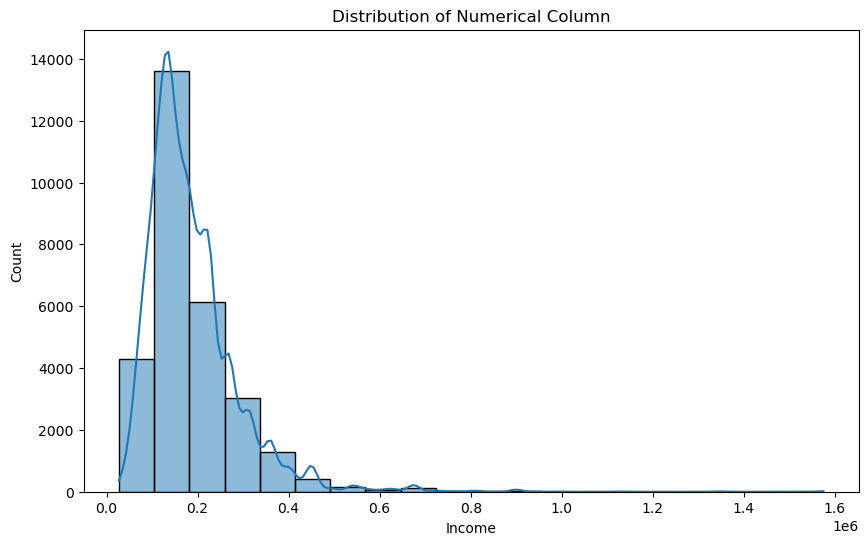

In [65]:
import matplotlib.pyplot as plt
import seaborn as sns

# Example of Univariate Analysis for a numerical variable
plt.figure(figsize=(10, 6))
sns.histplot(train_data['Income'], bins=20, kde=True)
plt.title('Distribution of Numerical Column')
plt.show()


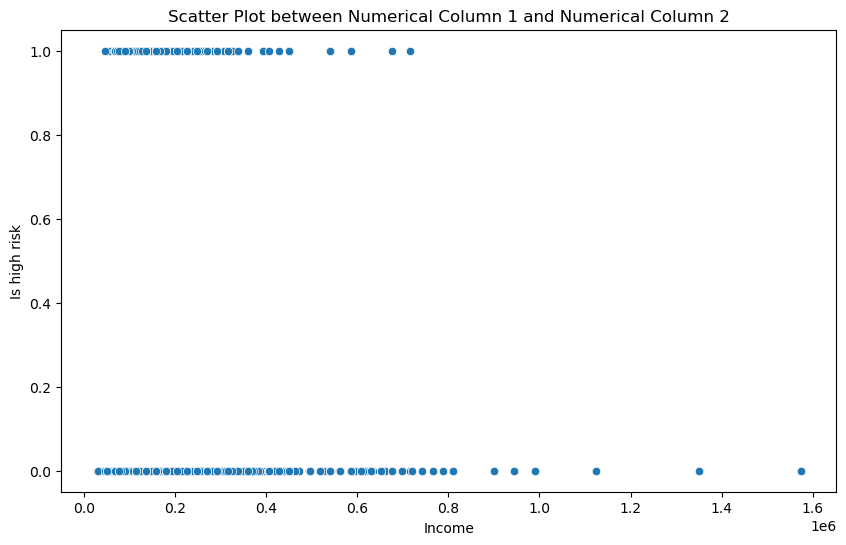

In [66]:
# Example of Bivariate Analysis for numerical variables
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Income', y='Is high risk', data=train_data)
plt.title('Scatter Plot between Numerical Column 1 and Numerical Column 2')
plt.show()




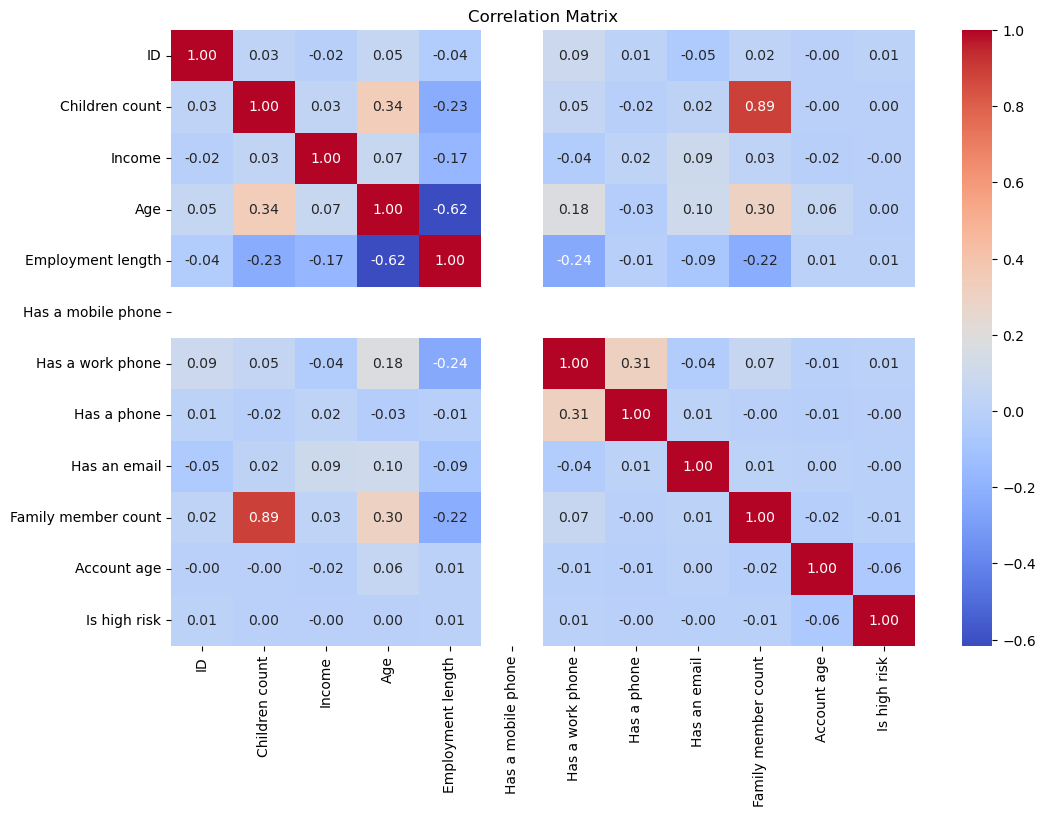

In [67]:
# Correlation matrix
correlation_matrix = train_data.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

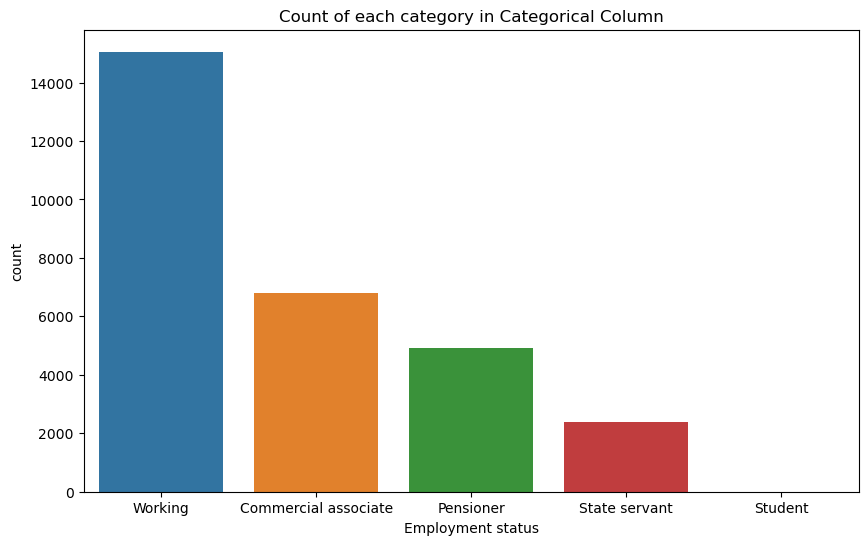

In [68]:
# Example of Univariate Analysis for a categorical variable
plt.figure(figsize=(10, 6))
sns.countplot(x='Employment status', data=train_data)
plt.title('Count of each category in Categorical Column')
plt.show()


In [69]:
def bar_plot(variable):

    #get feature
    var = train_data[variable]
    #count number of categorical variable(value/sample)
    varValue = var.value_counts()
    #visualize
    plt.figure(figsize = (9,3))
    plt.bar(varValue.index,varValue)
    plt.xticks(varValue.index,varValue.index.values)
    plt.ylabel("Count")
    plt.title(variable)
    plt.show()
    print("{}: \n {}".format(variable,varValue))

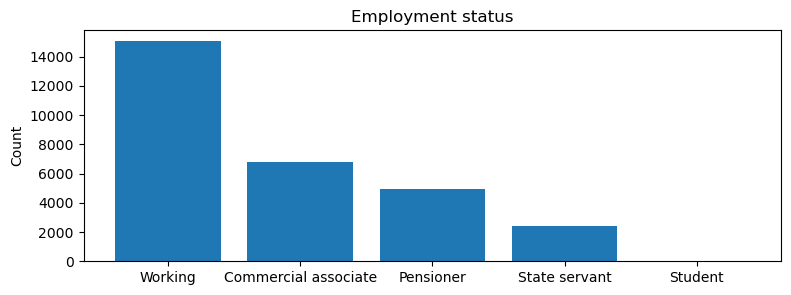

Employment status: 
 Working                 15056
Commercial associate     6801
Pensioner                4920
State servant            2381
Student                     7
Name: Employment status, dtype: int64


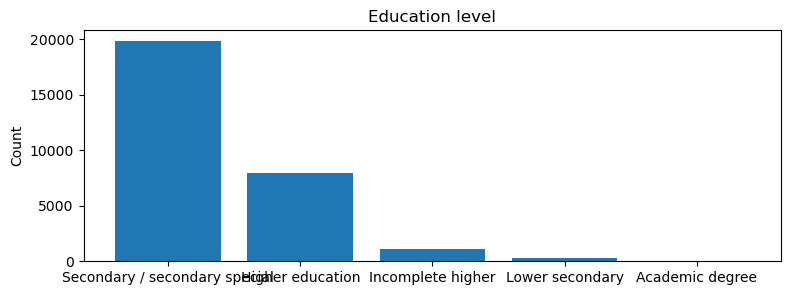

Education level: 
 Secondary / secondary special    19803
Higher education                  7910
Incomplete higher                 1129
Lower secondary                    298
Academic degree                     25
Name: Education level, dtype: int64


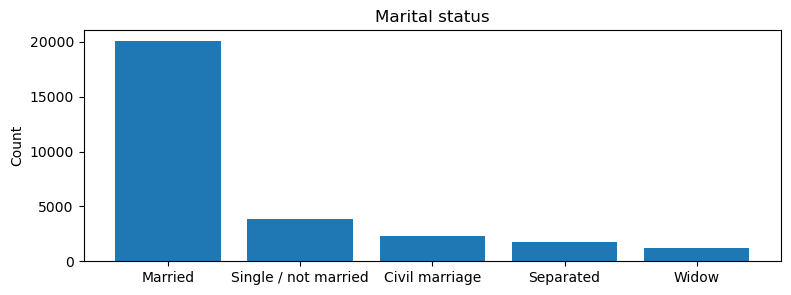

Marital status: 
 Married                 20044
Single / not married     3864
Civil marriage           2312
Separated                1712
Widow                    1233
Name: Marital status, dtype: int64


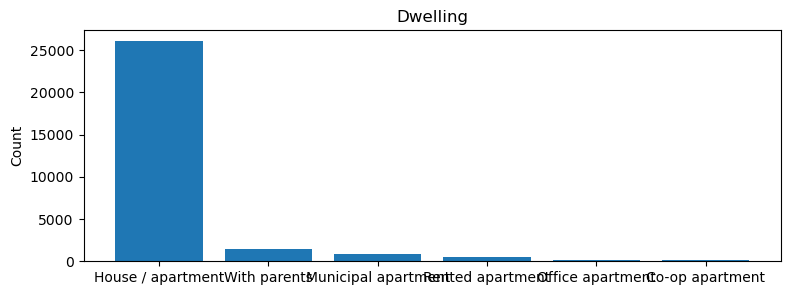

Dwelling: 
 House / apartment      26059
With parents            1406
Municipal apartment      912
Rented apartment         453
Office apartment         208
Co-op apartment          127
Name: Dwelling, dtype: int64


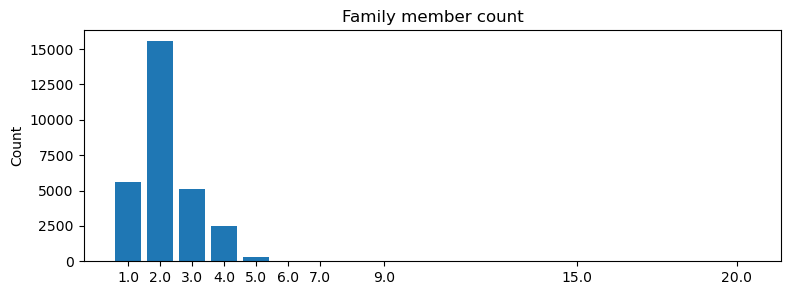

Family member count: 
 2.0     15552
1.0      5613
3.0      5121
4.0      2503
5.0       309
6.0        48
7.0        14
9.0         2
15.0        2
20.0        1
Name: Family member count, dtype: int64


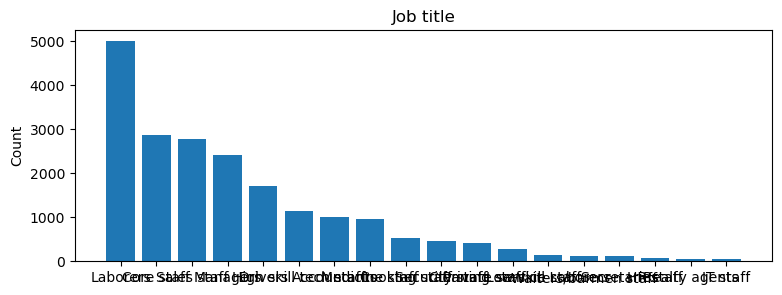

Job title: 
 Laborers                 5004
Core staff               2866
Sales staff              2773
Managers                 2422
Drivers                  1722
High skill tech staff    1133
Accountants               998
Medicine staff            956
Cooking staff             521
Security staff            464
Cleaning staff            425
Private service staff     287
Low-skill Laborers        138
Waiters/barmen staff      127
Secretaries               122
HR staff                   72
Realty agents              60
IT staff                   48
Name: Job title, dtype: int64


In [14]:
category = ["Employment status", "Education level", "Marital status", "Dwelling", "Family member count","Job title"
            ]
for c in category:
    bar_plot(c)

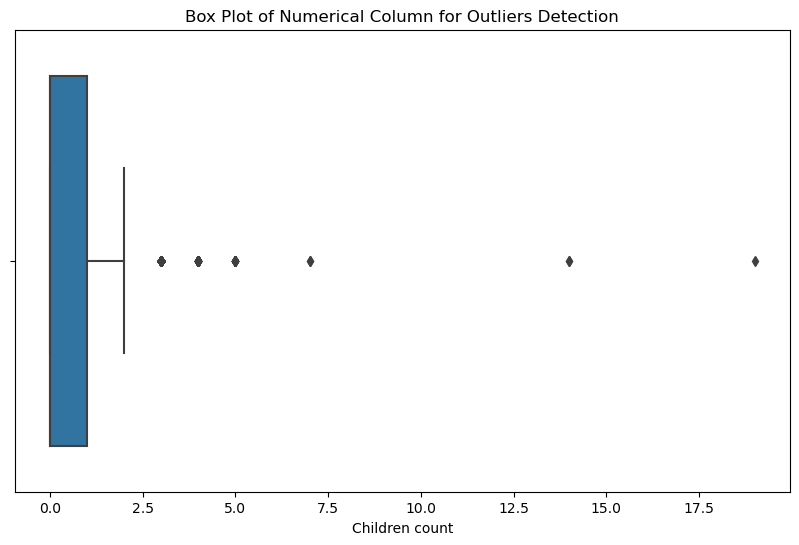

In [70]:
# Example of Outliers Detection
plt.figure(figsize=(10, 6))
sns.boxplot(x='Children count', data=train_data)
plt.title('Box Plot of Numerical Column for Outliers Detection')
plt.show()


In [ ]:
from sklearn.preprocessing import StandardScaler

# Example: Feature scaling
scaler = StandardScaler()
train_data['Family member count'] = scaler.fit_transform(train_data[['Children count']])


In [71]:
train_data.head()

,ID,Gender,Has a car,Has a property,Children count,Income,Employment status,Education level,Marital status,Dwelling,Age,Employment length,Has a mobile phone,Has a work phone,Has a phone,Has an email,Job title,Family member count,Account age,Is high risk
0,5037048,M,Y,Y,0,135000.0,Working,Secondary / secondary special,Married,With parents,-16271,-3111,1,0,0,0,Core staff,2.0,-17.0,0
1,5044630,F,Y,N,1,135000.0,Commercial associate,Higher education,Single / not married,House / apartment,-10130,-1651,1,0,0,0,Accountants,2.0,-1.0,0
2,5079079,F,N,Y,2,180000.0,Commercial associate,Secondary / secondary special,Married,House / apartment,-12821,-5657,1,0,0,0,Laborers,4.0,-38.0,0
3,5112872,F,Y,Y,0,360000.0,Commercial associate,Higher education,Single / not married,House / apartment,-20929,-2046,1,0,0,1,Managers,1.0,-11.0,0
4,5105858,F,N,N,0,270000.0,Working,Secondary / secondary special,Separated,House / apartment,-16207,-515,1,0,1,0,NaN,1.0,-41.0,0


In [ ]:
# Example: One-hot encoding
#train_data = pd.get_dummies(train_data, columns=['Gender'], drop_first=True)
#train_data = pd.get_dummies(train_data, columns=['Has a car'], drop_first=True)
#train_data = pd.get_dummies(train_data, columns=['Has a property'], drop_first=True)
#train_data = pd.get_dummies(train_data, columns=['Employment status'], drop_first=True)
#train_data = pd.get_dummies(train_data, columns=['Education level'], drop_first=True)
#train_data = pd.get_dummies(train_data, columns=['Marital status'], drop_first=True)
#train_data = pd.get_dummies(train_data, columns=['Dwelling'], drop_first=True)



In [72]:
# Assuming 'Job title' is a column in your DataFrame
job_titles = train_data['Job title']

# Get unique values in the 'Job title' column
unique_job_titles = job_titles.unique()

# Display the unique job titles
print(unique_job_titles)


['Core staff' 'Accountants' 'Laborers' 'Managers' nan 'Sales staff'
 'Medicine staff' 'High skill tech staff' 'HR staff' 'Low-skill Laborers'
 'Drivers' 'Secretaries' 'Cleaning staff' 'Cooking staff' 'Security staff'
 'Private service staff' 'IT staff' 'Waiters/barmen staff' 'Realty agents']


In [73]:
train_data['Gender'] = train_data['Gender'].map({"F": 0, "M": 1})
train_data['Marital status'] = train_data['Marital status'].map({"Single / not married": 0, "Married": 1, "Civil marriage": 2, "Widow": 3, "Separated": 4})
train_data['Has a car'] = train_data['Has a car'].map({"N": 0, "Y": 1})
train_data['Has a property'] = train_data['Has a property'].map({"N": 0, "Y": 1})
train_data['Employment status'] = train_data['Employment status'].map({"Commercial associate": 0, "Pensioner": 1, "State servant": 2, "Student": 3, "Working": 4})
train_data['Education level'] = train_data['Education level'].map({"Academic degree": 0, "Higher education": 1, "Incomplete higher": 2, "Lower secondary": 3, "Secondary / secondary special": 4})
train_data['Dwelling'] = train_data['Dwelling'].map({"Co-op apartment": 0, "House / apartment": 1, "Municipal apartment": 2, "Office apartment": 3, "Rented apartment": 4, "With parents": 5})
train_data['Job title'] = train_data['Job title'].map({'Core staff': 0, 'Accountants': 1, 'Laborers': 2, 'Managers': 3, 'Sales staff': 4,
                                                        'Medicine staff': 5, 'High skill tech staff': 6, 'HR staff': 7, 'Low-skill Laborers': 8,
                                                        'Drivers': 9, 'Secretaries': 10, 'Cleaning staff': 11, 'Cooking staff': 12, 'Security staff': 13,
                                                        'Private service staff': 14, 'IT staff': 15, 'Waiters/barmen staff': 16, 'Realty agents': 17})


In [74]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29165 entries, 0 to 29164
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   29165 non-null  int64  
 1   Gender               29165 non-null  int64  
 2   Has a car            29165 non-null  int64  
 3   Has a property       29165 non-null  int64  
 4   Children count       29165 non-null  int64  
 5   Income               29165 non-null  float64
 6   Employment status    29165 non-null  int64  
 7   Education level      29165 non-null  int64  
 8   Marital status       29165 non-null  int64  
 9   Dwelling             29165 non-null  int64  
 10  Age                  29165 non-null  int64  
 11  Employment length    29165 non-null  int64  
 12  Has a mobile phone   29165 non-null  int64  
 13  Has a work phone     29165 non-null  int64  
 14  Has a phone          29165 non-null  int64  
 15  Has an email         29165 non-null 

In [75]:
train_data.isnull().sum().sort_values(ascending=False).head(100)

Job title              9027
ID                        0
Gender                    0
Account age               0
Family member count       0
Has an email              0
Has a phone               0
Has a work phone          0
Has a mobile phone        0
Employment length         0
Age                       0
Dwelling                  0
Marital status            0
Education level           0
Employment status         0
Income                    0
Children count            0
Has a property            0
Has a car                 0
Is high risk              0
dtype: int64

In [76]:
total=train_data.isnull().sum().sort_values(ascending=False)
percent=(train_data.isnull().sum()/train_data.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])

missing_data.head(10)

,Total,Percent
Job title,9027,0.309515
ID,0,0.000000
Gender,0,0.000000
Account age,0,0.000000
Family member count,0,0.000000
Has an email,0,0.000000
Has a phone,0,0.000000
Has a work phone,0,0.000000
Has a mobile phone,0,0.000000
Employment length,0,0.000000


In [77]:
from sklearn.impute import KNNImputer

imputer = KNNImputer(n_neighbors=3)
train_data['Job title'] = imputer.fit_transform(train_data[['Job title']])


In [79]:
train_data=train_data.drop(['ID'],axis=1)


In [80]:
train_data.isnull().sum().sort_values(ascending=False).head(100)

Gender                 0
Employment length      0
Account age            0
Family member count    0
Job title              0
Has an email           0
Has a phone            0
Has a work phone       0
Has a mobile phone     0
Age                    0
Has a car              0
Dwelling               0
Marital status         0
Education level        0
Employment status      0
Income                 0
Children count         0
Has a property         0
Is high risk           0
dtype: int64

In [81]:
train_data

,Gender,Has a car,Has a property,Children count,Income,Employment status,Education level,Marital status,Dwelling,Age,Employment length,Has a mobile phone,Has a work phone,Has a phone,Has an email,Job title,Family member count,Account age,Is high risk
0,1,1,1,0,135000.0,4,4,1,5,-16271,-3111,1,0,0,0,0.000000,2.0,-17.0,0
1,0,1,0,1,135000.0,0,1,0,1,-10130,-1651,1,0,0,0,1.000000,2.0,-1.0,0
2,0,0,1,2,180000.0,0,4,1,1,-12821,-5657,1,0,0,0,2.000000,4.0,-38.0,0
3,0,1,1,0,360000.0,0,1,0,1,-20929,-2046,1,0,0,1,3.000000,1.0,-11.0,0
4,0,0,0,0,270000.0,4,4,4,1,-16207,-515,1,0,1,0,4.172063,1.0,-41.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29160,0,0,1,0,112500.0,1,4,0,1,-23400,365243,1,0,1,1,4.172063,1.0,-5.0,0
29161,0,0,1,1,135000.0,0,4,1,1,-15532,-8256,1,0,0,0,0.000000,3.0,-24.0,0
29162,0,0,1,0,76500.0,4,4,1,1,-17782,-3291,1,1,1,0,3.000000,2.0,-29.0,0
29163,0,0,1,0,157500.0,1,4,2,1,-21635,365243,1,0,1,0,4.172063,2.0,-37.0,0


In [82]:
test_data

,ID,Gender,Has a car,Has a property,Children count,Income,Employment status,Education level,Marital status,Dwelling,Age,Employment length,Has a mobile phone,Has a work phone,Has a phone,Has an email,Job title,Family member count,Account age,Is high risk
0,5091261,F,N,Y,0,202500.0,State servant,Secondary / secondary special,Separated,House / apartment,-16834,-1692,1,0,0,0,Medicine staff,1.0,-6.0,0
1,5096963,M,Y,N,0,675000.0,Commercial associate,Higher education,Married,House / apartment,-18126,-948,1,0,1,0,Managers,2.0,-16.0,0
2,5087880,F,N,N,0,234000.0,State servant,Higher education,Civil marriage,House / apartment,-21967,-5215,1,0,0,1,Core staff,2.0,-52.0,0
3,5021949,F,Y,Y,0,445500.0,Commercial associate,Higher education,Married,House / apartment,-12477,-456,1,0,0,0,Managers,2.0,-54.0,0
4,5105705,F,Y,N,0,225000.0,Working,Secondary / secondary special,Married,Municipal apartment,-12155,-667,1,0,0,0,Laborers,2.0,-48.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7287,5115415,F,Y,Y,0,135000.0,Working,Secondary / secondary special,Married,House / apartment,-21724,-1351,1,0,0,0,NaN,2.0,-22.0,0
7288,5068826,F,Y,Y,0,157500.0,Working,Higher education,Married,House / apartment,-14976,-3550,1,0,0,1,Drivers,2.0,-42.0,0
7289,5026088,F,N,Y,0,67500.0,Working,Secondary / secondary special,Widow,House / apartment,-20482,-5030,1,1,1,0,NaN,1.0,-25.0,0
7290,5142701,F,Y,N,0,95850.0,Commercial associate,Secondary / secondary special,Married,House / apartment,-18931,-6678,1,1,0,0,Laborers,2.0,-49.0,0


In [83]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7292 entries, 0 to 7291
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   7292 non-null   int64  
 1   Gender               7292 non-null   object 
 2   Has a car            7292 non-null   object 
 3   Has a property       7292 non-null   object 
 4   Children count       7292 non-null   int64  
 5   Income               7292 non-null   float64
 6   Employment status    7292 non-null   object 
 7   Education level      7292 non-null   object 
 8   Marital status       7292 non-null   object 
 9   Dwelling             7292 non-null   object 
 10  Age                  7292 non-null   int64  
 11  Employment length    7292 non-null   int64  
 12  Has a mobile phone   7292 non-null   int64  
 13  Has a work phone     7292 non-null   int64  
 14  Has a phone          7292 non-null   int64  
 15  Has an email         7292 non-null   i

In [84]:
test_data.isnull().sum().sort_values(ascending=False).head(100)

Job title              2296
ID                        0
Gender                    0
Account age               0
Family member count       0
Has an email              0
Has a phone               0
Has a work phone          0
Has a mobile phone        0
Employment length         0
Age                       0
Dwelling                  0
Marital status            0
Education level           0
Employment status         0
Income                    0
Children count            0
Has a property            0
Has a car                 0
Is high risk              0
dtype: int64

In [85]:
test_data['Gender'] = test_data['Gender'].map({"F": 0, "M": 1})
test_data['Marital status'] = test_data['Marital status'].map({"Single / not married": 0, "Married": 1, "Civil marriage": 2, "Widow": 3, "Separated": 4})
test_data['Has a car'] = test_data['Has a car'].map({"N": 0, "Y": 1})
test_data['Has a property'] = test_data['Has a property'].map({"N": 0, "Y": 1})
test_data['Employment status'] = test_data['Employment status'].map({"Commercial associate": 0, "Pensioner": 1, "State servant": 2, "Student": 3, "Working": 4})
test_data['Education level'] = test_data['Education level'].map({"Academic degree": 0, "Higher education": 1, "Incomplete higher": 2, "Lower secondary": 3, "Secondary / secondary special": 4})
test_data['Dwelling'] = test_data['Dwelling'].map({"Co-op apartment": 0, "House / apartment": 1, "Municipal apartment": 2, "Office apartment": 3, "Rented apartment": 4, "With parents": 5})
test_data['Job title'] = test_data['Job title'].map({'Core staff': 0, 'Accountants': 1, 'Laborers': 2, 'Managers': 3, 'Sales staff': 4,
                                                      'Medicine staff': 5, 'High skill tech staff': 6, 'HR staff': 7, 'Low-skill Laborers': 8,
                                                      'Drivers': 9, 'Secretaries': 10, 'Cleaning staff': 11, 'Cooking staff': 12, 'Security staff': 13,
                                                      'Private service staff': 14, 'IT staff': 15, 'Waiters/barmen staff': 16, 'Realty agents': 17})


In [86]:
from sklearn.impute import KNNImputer

imputer = KNNImputer(n_neighbors=3)
test_data['Job title'] = imputer.fit_transform(test_data[['Job title']])


In [87]:
test_data=test_data.drop(['ID'],axis=1)


In [88]:
# Assuming that the target variable is in a column named 'target' in both datasets
X_train = train_data.drop('Is high risk', axis=1)  # Features in the training dataset
y_train = train_data['Is high risk']  # Target variable in the training dataset

X_test1 = test_data.drop('Is high risk', axis=1)  # Features in the test dataset
y_test1 = test_data['Is high risk']  # Target variable in the test dataset


In [89]:
from sklearn.ensemble import RandomForestClassifier
tr= RandomForestClassifier(n_estimators= 10, criterion="entropy")  
tr.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=10)

In [90]:
y_pred= tr.predict(X_test1)  
from sklearn.metrics import confusion_matrix  
cm= confusion_matrix(y_test1, y_pred)

In [91]:
from sklearn.metrics import accuracy_score
# Calculate the accuracy
accuracy_1 = accuracy_score(y_test1, y_pred) * 100

print("Confusion Matrix:\n", cm)
print("Accuracy:", accuracy_1)

Confusion Matrix:
 [[7148   27]
 [ 102   15]]
Accuracy: 98.23093801426221


In [92]:
import scikitplot as skplt


Model:  Decision Tree Classifier
Validation Accuracy:  0.9701042238069116
Training Accuracy:  0.9985942053831648


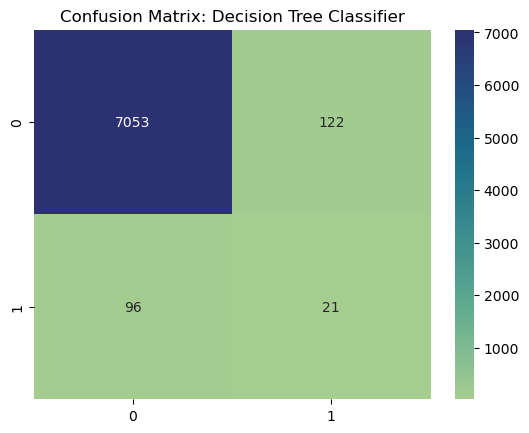

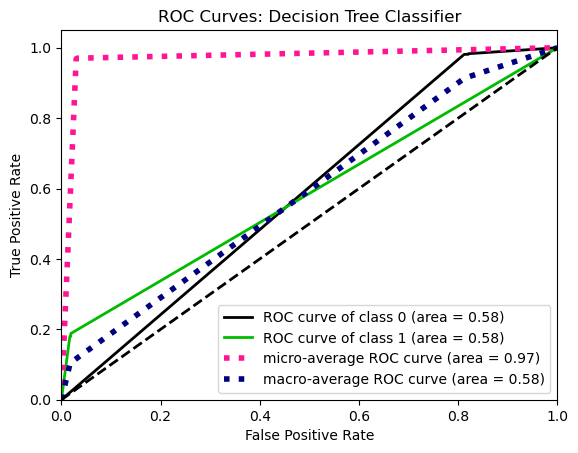

Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.98      0.98      7175
           1       0.15      0.18      0.16       117

    accuracy                           0.97      7292
   macro avg       0.57      0.58      0.57      7292
weighted avg       0.97      0.97      0.97      7292

-------------------------------------
Model:  Random Forest
Validation Accuracy:  0.982309380142622
Training Accuracy:  0.9985599177095834


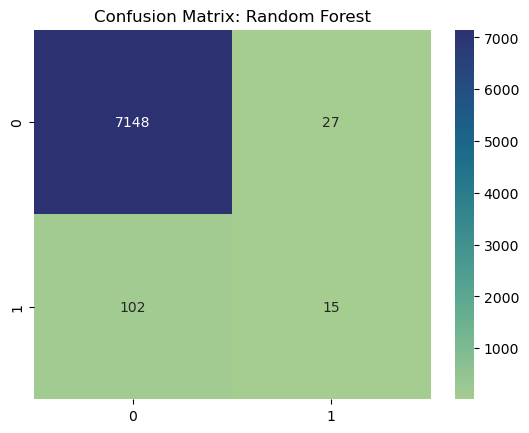

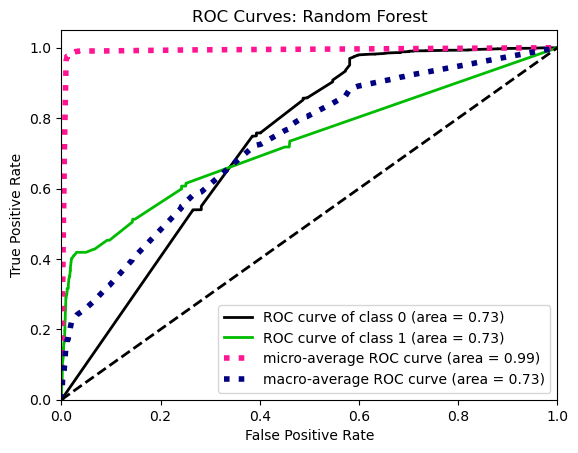

Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      7175
           1       0.36      0.13      0.19       117

    accuracy                           0.98      7292
   macro avg       0.67      0.56      0.59      7292
weighted avg       0.98      0.98      0.98      7292

-------------------------------------
Model:  KNN
Validation Accuracy:  0.9824465167306637
Training Accuracy:  0.9851191496656951


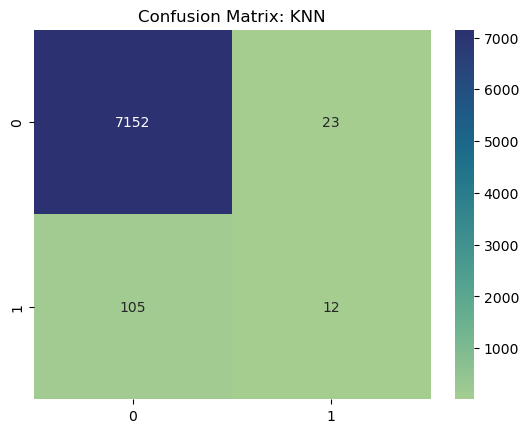

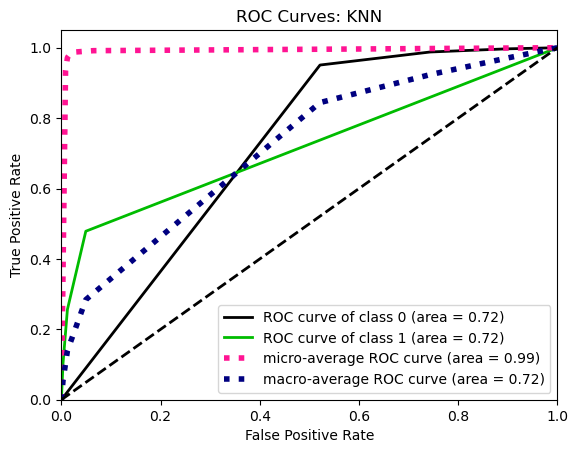

Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      7175
           1       0.34      0.10      0.16       117

    accuracy                           0.98      7292
   macro avg       0.66      0.55      0.57      7292
weighted avg       0.98      0.98      0.98      7292

-------------------------------------
Model:  xgboost
Validation Accuracy:  0.9842292923752057
Training Accuracy:  0.9885822046974113


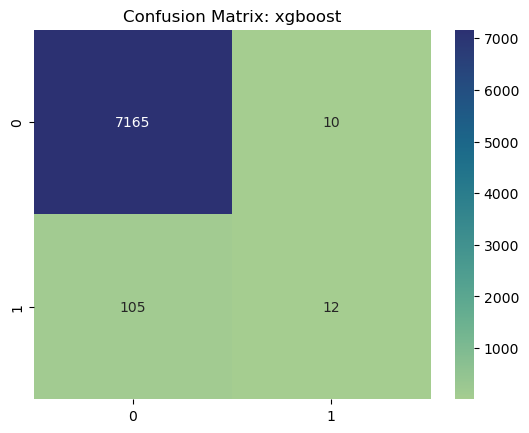

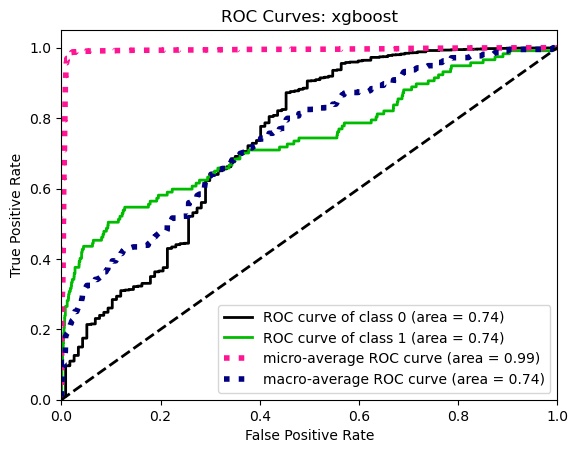

Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      7175
           1       0.55      0.10      0.17       117

    accuracy                           0.98      7292
   macro avg       0.77      0.55      0.58      7292
weighted avg       0.98      0.98      0.98      7292

-------------------------------------
                      Model  Accuracy
0  Decision Tree Classifier  0.970104
1             Random Forest  0.982309
2                       KNN  0.982447
3                   xgboost  0.984229


In [93]:
from sklearn.metrics import classification_report

models = [
          ('Decision Tree Classifier', DecisionTreeClassifier()),
          ('Random Forest', RandomForestClassifier()),
          ('KNN', KNeighborsClassifier()),
          ('xgboost',XGBClassifier()),
]

models_score = []

for name, model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test1)
    models_score.append([name, accuracy_score(y_test1, y_pred)])

    print("Model: ", name)
    print('Validation Accuracy: ', accuracy_score(y_test1, y_pred))
    print('Training Accuracy: ', accuracy_score(y_train, model.predict(X_train)))

    # Confusion Matrix
    plt.figure()
    cf_matrix = confusion_matrix(y_test1, y_pred)
    sns.heatmap(cf_matrix, annot=True, fmt='g', cmap='crest')
    plt.title('Confusion Matrix: {}'.format(name))
    plt.show()

    # ROC Curve
    skplt.metrics.plot_roc(y_test1, model.predict_proba(X_test1))
    plt.title('ROC Curves: {}'.format(name))
    plt.show()

    # Classification Report
    print("Classification Report:")
    print(classification_report(y_test1, y_pred))

    print("-------------------------------------")

# Display the overall performance scores
models_score_df = pd.DataFrame(models_score, columns=['Model', 'Accuracy'])
print(models_score_df)


In [94]:
from sklearn.ensemble import RandomForestClassifier

# Assuming RandomForestClassifier is the chosen model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predict on the test dataset
y_pred = model.predict(X_test1)

# Feature importance scores
feature_importance = model.feature_importances_

# Display feature importance scores
feature_importance_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': feature_importance})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)
print("Feature Importance Scores:")
print(feature_importance_df)

# Evaluate the model
accuracy = accuracy_score(y_test1, y_pred)
print("Accuracy on Test Data:", accuracy)

# Confusion Matrix
conf_matrix = confusion_matrix(y_test1, y_pred)
print("Confusion Matrix:\n", conf_matrix)

# Classification Report
print("Classification Report:")
print(classification_report(y_test1, y_pred))


Feature Importance Scores:
                Feature  Importance
17          Account age    0.234011
9                   Age    0.194230
10    Employment length    0.142226
4                Income    0.112007
15            Job title    0.057951
7        Marital status    0.037427
16  Family member count    0.031451
5     Employment status    0.027730
6       Education level    0.026350
3        Children count    0.022725
1             Has a car    0.020957
13          Has a phone    0.019471
0                Gender    0.018101
8              Dwelling    0.017384
12     Has a work phone    0.014763
2        Has a property    0.013644
14         Has an email    0.009573
11   Has a mobile phone    0.000000
Accuracy on Test Data: 0.982309380142622
Confusion Matrix:
 [[7148   27]
 [ 102   15]]
Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      7175
           1       0.36      0.13      0.19       117

    accuracy   

Accuracy on Test Data (using top 12 features): 0.9826
Confusion Matrix:
 [[7147   28]
 [  99   18]]
Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      7175
           1       0.39      0.15      0.22       117

    accuracy                           0.98      7292
   macro avg       0.69      0.57      0.61      7292
weighted avg       0.98      0.98      0.98      7292



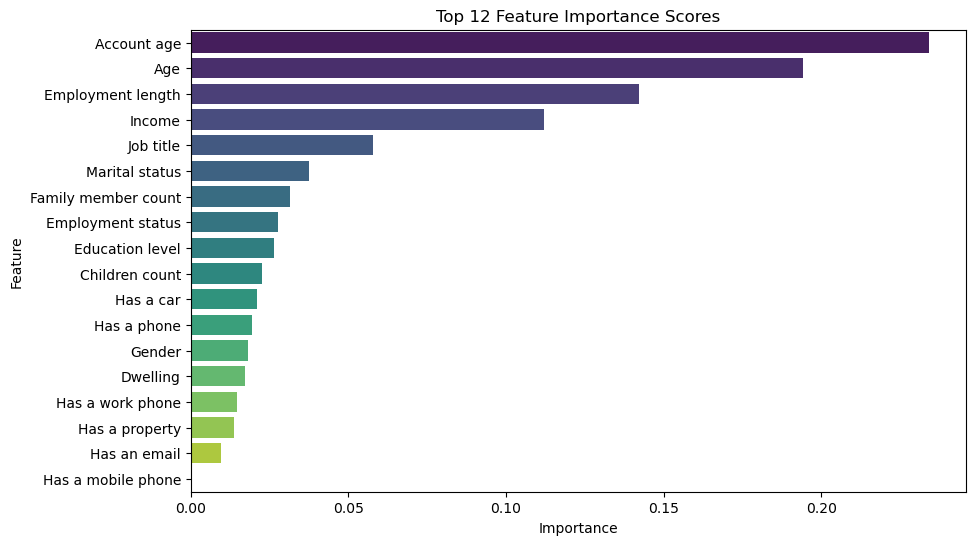

In [105]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming RandomForestClassifier is the chosen model
model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model on the training dataset (X_train, y_train)
model.fit(X_train, y_train)

# Feature Importance Scores
feature_importance = model.feature_importances_

# Display top N feature importance scores
top_n_features = 12  # Set the number of top features to consider

# Select the top N important features
top_features = X_train.columns[np.argsort(feature_importance)[::-1][:top_n_features]]

# Train the model using only the top N features
model.fit(X_train[top_features], y_train)

# Predict on the test dataset using only the top N features
y_pred = model.predict(X_test1[top_features])

# Evaluate the model
accuracy = accuracy_score(y_test1, y_pred)
print("Accuracy on Test Data (using top {} features): {:.4f}".format(top_n_features, accuracy))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test1, y_pred)
print("Confusion Matrix:\n", conf_matrix)

# Classification Report
print("Classification Report:")
print(classification_report(y_test1, y_pred))

# Plotting top N feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df, palette='viridis')
plt.title(f'Top {top_n_features} Feature Importance Scores')
plt.show()
